<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [1]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : false



Test Summary:         | Pass  Total   Time


Lagrangien augmenté   |   12     12  10.1s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

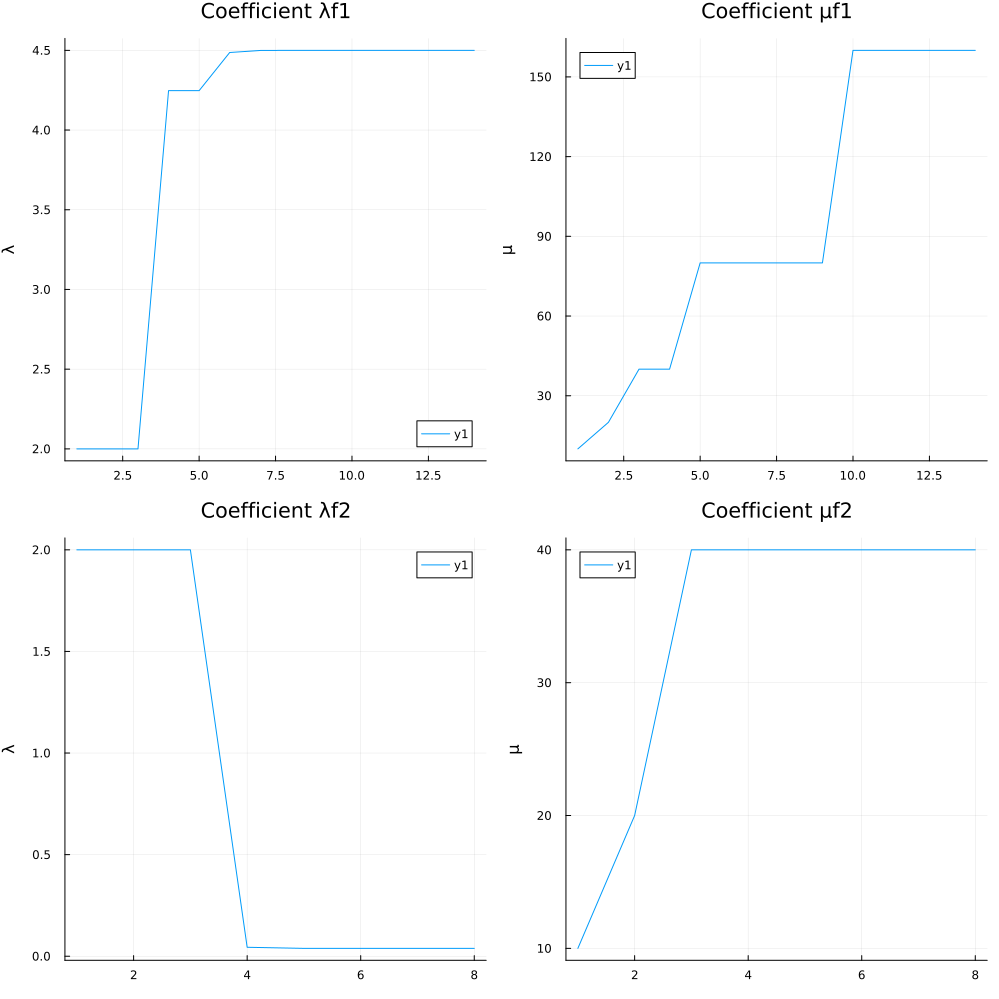

In [2]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Fonction de test 1
_,_,_,_,μf1,λf1 = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="newton")

# 𝜆𝑘
λ_courbe_1 = plot(λf1, xlabel = "", ylabel = "λ", title = "Coefficient λf1")

# 𝜇𝑘
μ_courbe_1 = plot(μf1, xlabel = "", ylabel = "μ", title = "Coefficient μf1")

# Fonction de test 2
_,_,_,_,μf2,λf2 = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, x04)

# 𝜆𝑘
λ_courbe_2 = plot(λf2, xlabel = "", ylabel = "λ", title = "Coefficient λf2")

# 𝜇𝑘
μ_courbe_2 = plot(μf2, xlabel = "", ylabel = "μ", title = "Coefficient μf2")

# Affichage des courbes
plot(λ_courbe_1, μ_courbe_1, λ_courbe_2, μ_courbe_2, layout = (2,2), size = (1000,1000))

**Q1** Nous remarquons que le facteurs de pénalité μ augmente de facon signicative dans la résolution du problème 1, puisque pour la fonction f1 l'optimisation se rapproche plus rapidement de la solution réalisable du problème, càd l'algorithme converge plus rapidement vers la solution qui satisfait les contraintes du problème, contrairement à la fonction f2 d'où la différence de la pente des deux courbes de μ.
Pour λ, on remarque qu'il augmente au fur et à mesure que le nombre d'itération augmente ce qui veut dire que l'optimisation se dévie des contraintes, contrairement à f2, on voit que le coefficient diminue au cours des itérations ce qui montre que l'optimisation pour la fonction f2 est en bon chemin et respecte les contraintes imposées.

**Q2**

In [3]:
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Effet de tau sur les performances de l'algorithme
tau = range(1, 10, length = 10)
nb_iterations = zeros(50)
for i in 1:50
    _,_,_,nb_iterations[i],_,_ = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, τ = tau[i])
end

# Affichage
plot(tau, nb_iterations, xlabel = "τ", ylabel = "Nombre d'itérations", title = "Effet de tau sur les performances de l'algorithme")

--> Je n'ai pas pu interpréter à partir de la courbe car elle a pris beaucoup de temps mais ne veut toujours pas se dessiner.

En général, une augmentation de $\tau$ peut accélérer la croissance de μ au fil des itérations, cela peut intensifier la pénalité pour les violations de contraintes, incitant potentiellement l'algorithme à converger plus rapidement vers une solution réalisable. Mais, une valeur excessive de ce $\tau$ pourrait conduire à une surpénalisation, ce qui peut rendre l'optimisation plus sensible. Cela pourrait potentiellement entraîner une convergence instable.